# Simple Machine Learning
for more information, https://www.kaggle.com/ronitf/heart-disease-uci/

# Import Dependancies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML
import seaborn as sns

In [2]:
df_heart = pd.read_csv("data/heart.csv")

In [3]:
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaadd15e80>,
      dtype=object)

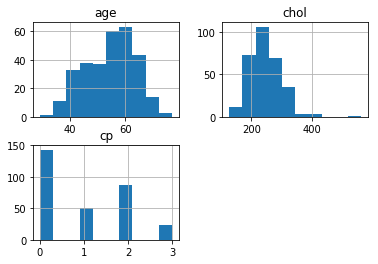

In [5]:
df_heart.hist(['chol','age', 'cp'])

In [6]:
wgt_col_select_x = widgets.Dropdown(
    options=list(df_heart.columns),
    value=df_heart.columns[0],
    description='Column X',
    disabled=False,
)
wgt_col_select_y = widgets.Dropdown(
    options=list(df_heart.columns),
    value=df_heart.columns[1],
    description='Column Y',
    disabled=False,
)

def show_lmplot(x, y):
    ax = sns.lmplot(x=x, y=y, data=df_heart)
    
# setup interactive widgets
out_3 = widgets.interactive_output(
    show_lmplot, 
    {
        'x': wgt_col_select_x,
        'y': wgt_col_select_y
    }
)

# show widgets
display(
    wgt_col_select_x,  
    wgt_col_select_y,
    out_3
)

Dropdown(description='Column X', options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',…

Dropdown(description='Column Y', index=1, options=('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', '…

Output()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

"""
NOTE: If using conda, install graphviz with, 'conda install graphviz'
"""
import pydotplus

In [13]:
def train(features):
    model = DecisionTreeClassifier(max_depth=4)

    # get columns
    y, x = df_heart['target'], df_heart[features]

    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    # y_train
    clf = model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    return (metrics.accuracy_score(y_test, y_predicted), clf)

# Explore Model Accuracy

In [14]:
features = ['sex', 'chol', 'ca', 'thal', 'slope']
results = train(features)
print(f"Accuracy: {results[0]}")

print("Feature Importance")
for i in range(len(results[1].feature_importances_)):
    feat_imp = results[1].feature_importances_[i]
    feat = features[i]
    print("{:>8} - {:>4}".format(feat, feat_imp))

Accuracy: 0.7763157894736842
Feature Importance
     sex - 0.10978253743542743
    chol - 0.10551584974355172
      ca - 0.4043206141319216
    thal - 0.17934968654113367
   slope - 0.20103131214796552


# Plot Decision Tree

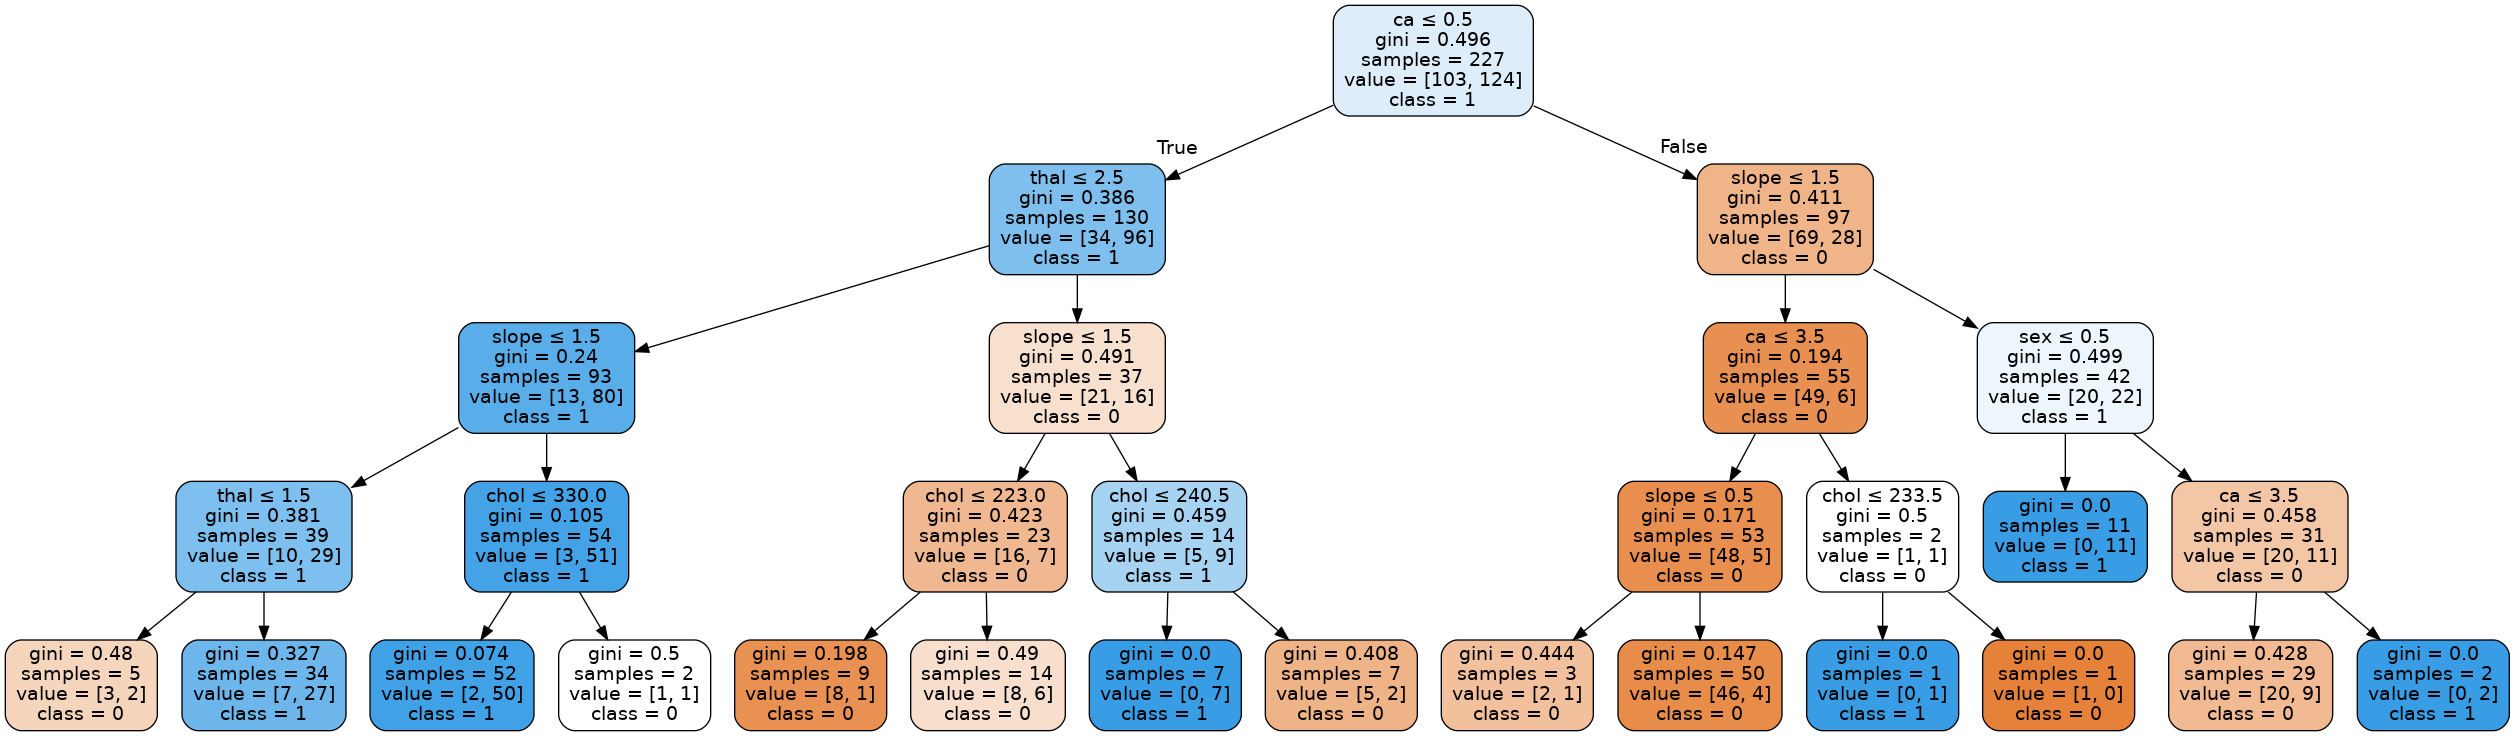

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(results[1], 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=features, 
                class_names=['0','1']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_disease.png')
Image(graph.create_png())